# rf710_roopoly
Taylor expansion of RooFit functions using the taylorExpand function with RooPolyFunc




**Author:** Rahul Balasubramanian  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:20 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooPolyFunc.h"
#include "RooAbsCollection.h"
#include "RooPlot.h"
#include "TCanvas.h"

using namespace RooFit;

Create polynomial
function of fourth order
---------------------------------------------
x^4 - 5x^3 + 5x^2 + 5x -6
---------------------------------------------

In [2]:
RooRealVar x("x", "x", 0, -3, 10);
RooPolyFunc f("f", "f", RooArgSet(x));
f.addTerm(+1, x, 4);
f.addTerm(-5, x, 3);
f.addTerm(+5, x, 2);
f.addTerm(+5, x, 1);
f.addTerm(-6, x, 0);

Create taylor expansion
---------------------------------------------

In [3]:
double x0 = 2.0;
auto taylor_o1 = RooPolyFunc::taylorExpand("taylor_o1", "taylor expansion order 1", f, {x}, 1, {x0});
auto taylor_o2 = RooPolyFunc::taylorExpand("taylor_o2", "taylor expansion order 2", f, {x}, 2, {x0});

Plot polynomial with first and second order taylor expansion overlaid

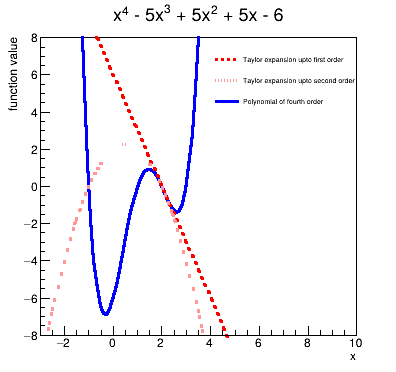

Info in <TCanvas::Print>: png file rf710_roopoly.png has been created


In [4]:
auto frame = x.frame(Title("x^{4} - 5x^{3} + 5x^{2} + 5x - 6"));
auto c = new TCanvas("rf710_roopoly", "rf710_roopoly", 400, 400);
c->cd();

f.plotOn(frame, Name("f"));
taylor_o1->plotOn(frame, LineColor(kRed), LineStyle(kDashed), Name("taylor_o1"));
taylor_o2->plotOn(frame, LineColor(kRed - 9), LineStyle(kDotted), Name("taylor_o2"));

frame->SetMinimum(-8.0);
frame->SetMaximum(+8.0);
frame->SetYTitle("function value");
frame->Draw();

auto legend = new TLegend(0.53, 0.7, 0.86, 0.87);
legend->SetFillColor(kWhite);
legend->SetLineColor(kWhite);
legend->SetTextSize(0.02);
legend->AddEntry("taylor_o1", "Taylor expansion upto first order", "L");
legend->AddEntry("taylor_o2", "Taylor expansion upto second order", "L");
legend->AddEntry("f", "Polynomial of fourth order", "L");
legend->Draw();
c->Draw();
c->SaveAs("rf710_roopoly.png");

Draw all canvases 

In [5]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()